In [1]:
import numpy as np
import pandas as pd
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

In [2]:
train_df = pd.read_csv('./data/fl_2022_FullName_train.csv.gz')
val_df = pd.read_csv('./data/fl_2022_FullName_val.csv.gz')
test_df = pd.read_csv('./data/fl_2022_FullName_test.csv.gz')

In [3]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(7214894, 9)
(901862, 9)
(901862, 9)


In [4]:
train_df.head()

,full_name,asian,hispanic,nh_black,nh_white,other,total_n,race,race_code
0,Veit Karen,0.0,0.0,0.0,1.0,0.0,2.0,nh_white,3
1,Barahona Octavio,0.0,1.0,0.0,0.0,0.0,1.0,hispanic,1
2,Albert Jurieal,0.0,0.0,1.0,0.0,0.0,1.0,nh_black,2
3,Foco Kevin,0.0,0.0,0.0,1.0,0.0,1.0,nh_white,3
4,Ewen Deborah,0.0,0.0,0.0,1.0,0.0,1.0,nh_white,3


## Extract features

In [5]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 2), min_df=50, lowercase=False)

In [6]:
X_train = vectorizer.fit_transform(train_df['full_name'])
X_val = vectorizer.transform(val_df['full_name'])
X_test = vectorizer.transform(test_df['full_name'])

In [7]:
X_train.shape

(7214894, 1267)

In [8]:
X_val.shape

(901862, 1267)

In [9]:
X_test.shape

(901862, 1267)

In [10]:
vectorizer.get_feature_names_out()

array([' ', " '", ' -', ..., 'zw', 'zy', 'zz'], dtype=object)

In [11]:
len(vectorizer.get_feature_names_out())

1267

In [12]:
vocab = vectorizer.get_feature_names_out()

In [13]:
y_train = train_df.race_code
y_val = val_df.race_code
y_test = test_df.race_code

In [14]:
y_train[0]

3

In [15]:
#Create a Gaussian Classifier
samples = 100 * 100 * 100
clf = RandomForestClassifier(criterion = 'entropy', random_state=42, max_samples=samples, verbose=6, n_jobs=-1)

In [16]:
print(X_train.shape)
print(X_test.shape)

(7214894, 1267)
(901862, 1267)


## Training

In [17]:
%%time

clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed: 76.2min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100building tree 57 of 100

building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done  98 out of 100 | elapsed: 287.0min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 287.4min finished


CPU times: user 1d 16h 46min 56s, sys: 12min 8s, total: 1d 16h 59min 5s
Wall time: 4h 47min 33s


RandomForestClassifier(criterion='entropy', max_samples=1000000, n_jobs=-1,
                       random_state=42, verbose=6)

In [18]:
%%time
y_pred = clf.predict(X_val)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_val, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   12.9s
[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:  1.6min remaining:    1.9s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:  1.6min finished


Test Accuracy: 0.767532061446208
CPU times: user 11min 3s, sys: 31.2 s, total: 11min 34s
Wall time: 1min 41s


In [19]:
%%time
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:   15.1s remaining:    0.3s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   15.2s finished


Test Accuracy: 0.7675265173607492
CPU times: user 2min 23s, sys: 1.96 s, total: 2min 25s
Wall time: 20.6 s


In [20]:
joblib.dump(vectorizer, "models/rf_vec_fullname.joblib", compress=3)  # compression is ON!

['models/rf_vec_fullname.joblib']

In [21]:
joblib.dump(clf, "models/rf_model_fullname.joblib", compress=3)  # compression is ON!

['models/rf_model_fullname.joblib']

## Confusion Matrix

In [22]:
race_id_df = train_df[['race', 'race_code']].drop_duplicates().sort_values('race_code')
race_to_id = dict(race_id_df.values)

In [23]:
race_to_id

{'asian': 0, 'hispanic': 1, 'nh_black': 2, 'nh_white': 3, 'other': 4}

In [24]:
id_to_race = dict(race_id_df[['race_code', 'race']].values)

In [25]:
id_to_race

{0: 'asian', 1: 'hispanic', 2: 'nh_black', 3: 'nh_white', 4: 'other'}

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    6.6s
[Parallel(n_jobs=10)]: Done  98 out of 100 | elapsed:   16.8s remaining:    0.3s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:   17.0s finished


              precision    recall  f1-score   support

       asian       0.79      0.19      0.31     25756
    hispanic       0.84      0.72      0.77    163525
    nh_black       0.83      0.27      0.41    133471
    nh_white       0.75      0.97      0.84    552737
       other       0.41      0.00      0.01     26373

    accuracy                           0.77    901862
   macro avg       0.72      0.43      0.47    901862
weighted avg       0.77      0.77      0.73    901862



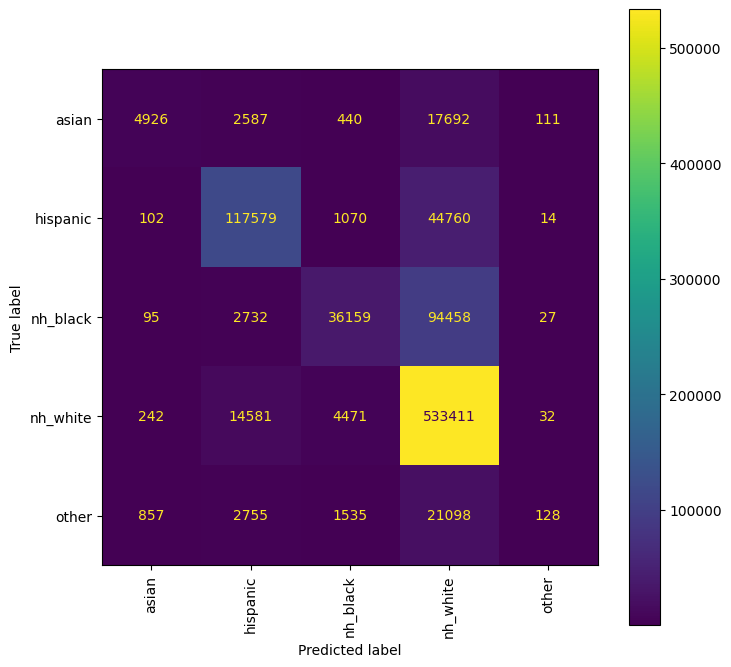

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline  

model_1m = joblib.load('models/rf_model_fullname.joblib')
preds = model_1m.predict(X_test)
predicted = [id_to_race[p] for p in preds]
actual = [id_to_race[p] for p in y_test.values]

report = classification_report(actual, predicted)
print(report)

cm = confusion_matrix(actual, predicted, labels=list(race_to_id.keys()))
cmp = ConfusionMatrixDisplay(cm, display_labels=list(race_to_id.keys()))
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax, xticks_rotation='vertical')

In [27]:
for class_id in id_to_race:
    correct = np.sum((y_test == class_id) & (preds == class_id))
    total = np.sum(y_test == class_id)
    print(f'Accuracy for class {id_to_race[class_id]}: {correct / total:.2f}')

Accuracy for class asian: 0.19
Accuracy for class hispanic: 0.72
Accuracy for class nh_black: 0.27
Accuracy for class nh_white: 0.97
Accuracy for class other: 0.00
